# Homework 04: Visualization, Correlation, and Linear Models

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'tengdann'

## Download the data from: 

* [https://www.kaggle.com/datasnaek/youtube-new](https://www.kaggle.com/datasnaek/youtube-new)

> YouTube provides a list of trending videos on it's site, determined by user interaction metrics such as likes, comments, and views. This dataset includes months of daily trending video across five different regions: the United States ("US"), Canada ("CA"), Great Britain ("GB"), Germany ("DE"), and France ("FR").

* https://www.kaggle.com/abcsds/pokemon

> This data set includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

## Part 1: Answer the questions below based on the *[YouTube dataset](https://www.kaggle.com/datasnaek/youtube-new)*
- Write Python code that can answer the following questions, and
- <b>Explain your answers in plain English. </b>

### Q1. For 15 Points: Compare the distributions of comments, views, likes, and dislikes

* Plot histograms for these metrics *for the US*. What can you say about them?
* Try to apply a log transformation, and plot the histograms again. How do they look now?
* Create a pairplot *for the US*, as we did in this week's lab. Do you see anything interesting?
* Create additional pairplots for the other four regions. Do they look similar?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_ca = pd.read_csv('data/hw4_data/youtube/CAvideos.csv')
df_de = pd.read_csv('data/hw4_data/youtube/DEvideos.csv')
df_fr = pd.read_csv('data/hw4_data/youtube/FRvideos.csv')
df_gb = pd.read_csv('data/hw4_data/youtube/GBvideos.csv')
df_in = pd.read_csv('data/hw4_data/youtube/INvideos.csv')
# df_jp = pd.read_csv('data/hw4_data/youtube/JPvideos.csv')
# df_kr = pd.read_csv('data/hw4_data/youtube/KRvideos.csv')
# df_mx = pd.read_csv('data/hw4_data/youtube/MXvideos.csv')
# df_ru = pd.read_csv('data/hw4_data/youtube/RUvideos.csv')
df_us = pd.read_csv('data/hw4_data/youtube/USvideos.csv')

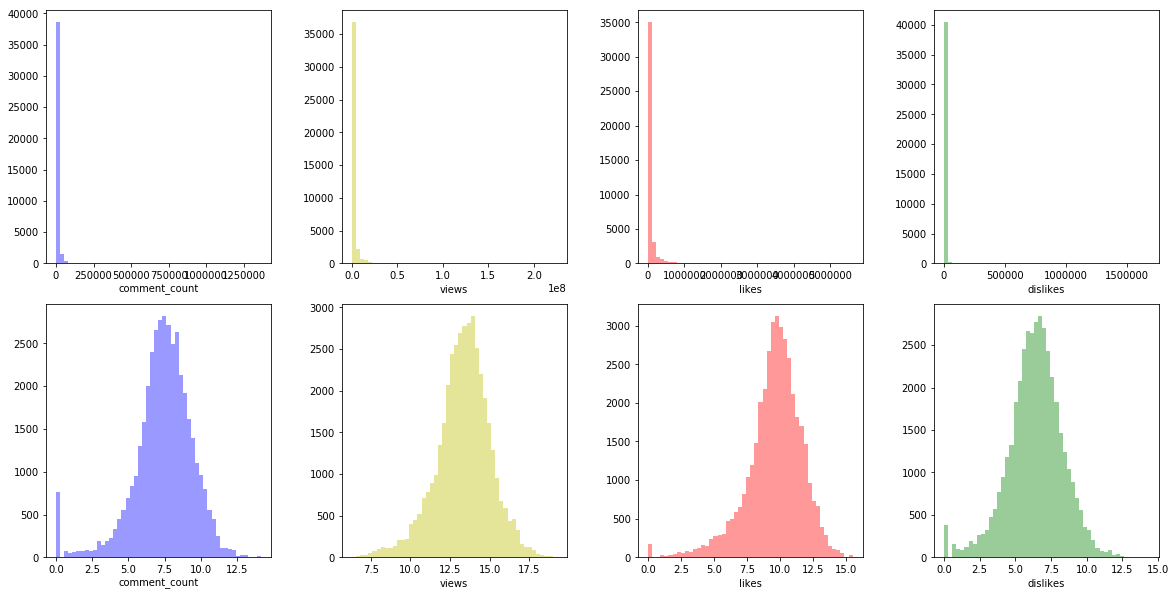

In [4]:
df_us_clean = df_us[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_ca_clean = df_ca[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_de_clean = df_de[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_fr_clean = df_fr[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
df_gb_clean = df_gb[['video_id', 'title', 'comment_count', 'views', 'likes', 'dislikes']].copy()
fig, axs = plt.subplots(2, 4, figsize = (16,8))
plt.tight_layout(pad = 0.4, w_pad = 4, h_pad = 2)

sns.distplot(df_us_clean.comment_count, color = 'b', kde = False, ax = axs[0,0])
sns.distplot(df_us_clean.views, color = 'y', kde = False, ax = axs[0,1])
sns.distplot(df_us_clean.likes, color = 'r', kde = False, ax = axs[0,2])
sns.distplot(df_us_clean.dislikes, color = 'g', kde = False, ax = axs[0,3])

df_us_clean_log = df_us_clean.copy()
df_us_clean_log[['comment_count', 'views', 'likes', 'dislikes']] = np.log(df_us_clean_log[['comment_count', 'views', 'likes', 'dislikes']] + 1) # Need + 1 for 0 values

sns.distplot(df_us_clean_log.comment_count, color = 'b', kde = False, ax = axs[1,0])
sns.distplot(df_us_clean_log.views, color = 'y', kde = False, ax = axs[1,1])
sns.distplot(df_us_clean_log.likes, color = 'r', kde = False, ax = axs[1,2])
sns.distplot(df_us_clean_log.dislikes, color = 'g', kde = False, ax = axs[1,3])

The non-transformed histograms appear to be power distributions.

The log-transformed histograms now appear to have a normal distribution.

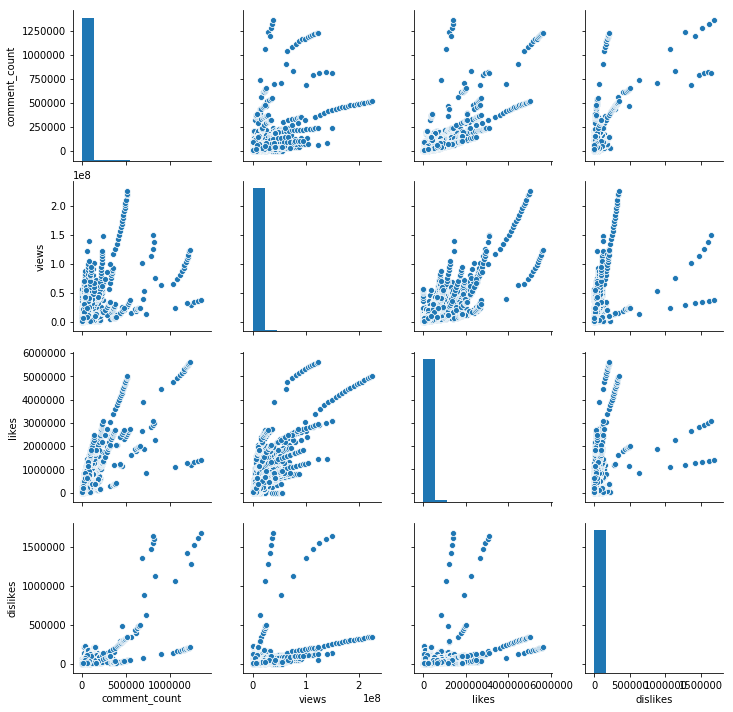

In [6]:
sns.pairplot(df_us_clean)

The concurrent line of dots appear to all be the same video, just at different points of time. It would make sense for those to follow a linear correlation. There appears to be a strong positive correlationb etween likes and views.

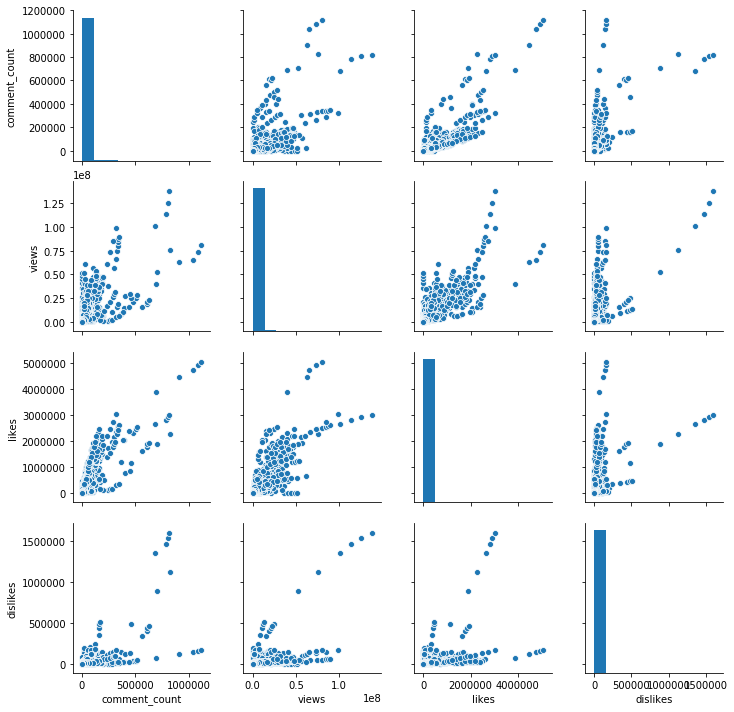

In [5]:
sns.pairplot(df_ca_clean)

The plots for the CA region appears to be similar to the plots for the US region. There still appears to be a positive strong correlation between likes and views.

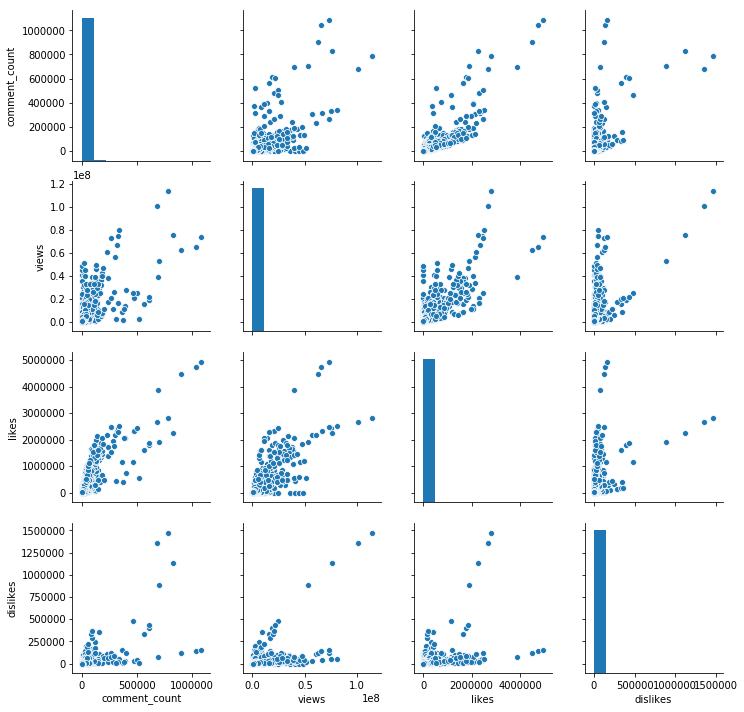

In [6]:
sns.pairplot(df_de_clean)

The plots for the DE region appear similar to the plots for the US region. There still appears to be a strong positive correlation between likes and views.

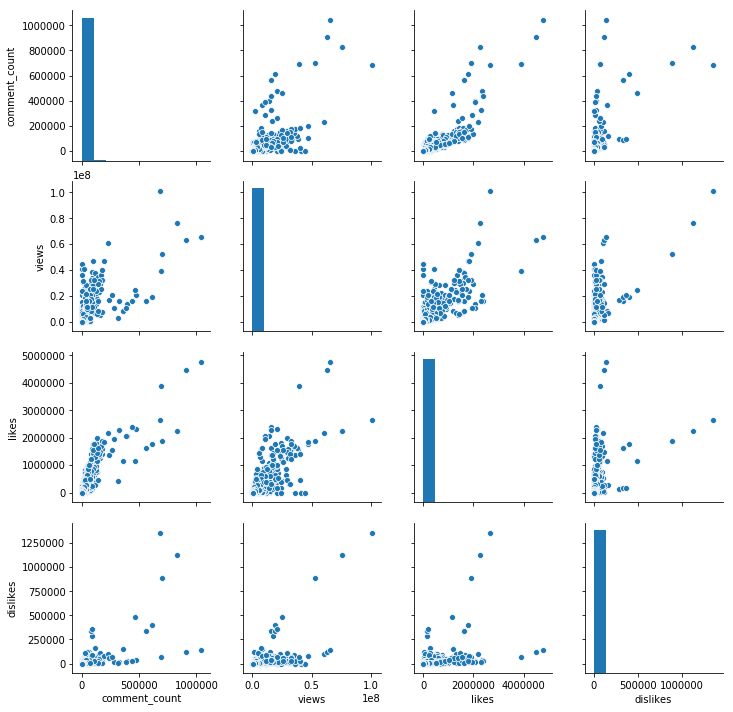

In [7]:
sns.pairplot(df_fr_clean)

The plots for the FR region appear similar to the plots fo the US region. There still appears to be a strong positive correlation between likes and views.

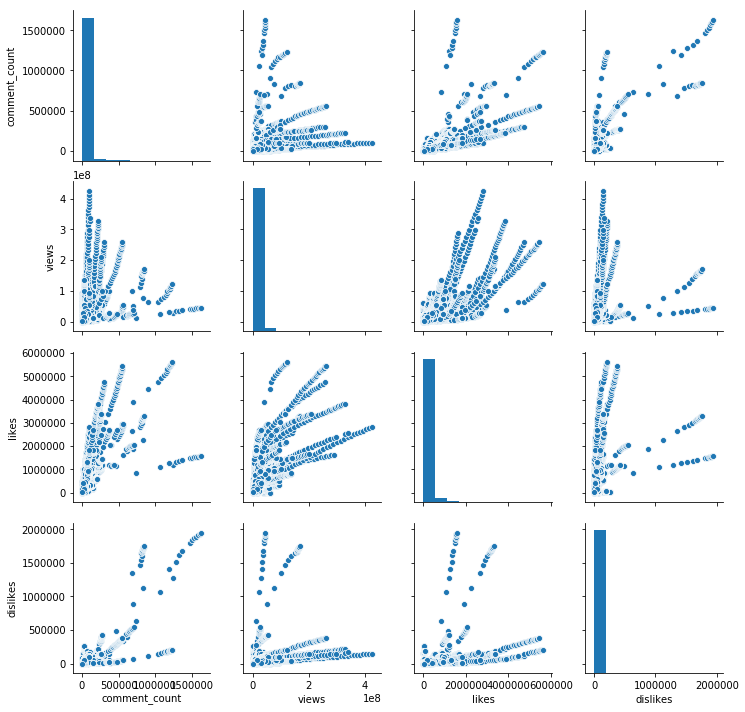

In [8]:
sns.pairplot(df_gb_clean)

The plots for the GB region appear similar to the plots for the US region. However, there are now strong positive correlations between likes/comment_count, likes/views, and likes/dislikes.

### Q2. For 10 Points: Create a heatmap of correlations between the variables for a region of your choice

>A [heat map (or heatmap)](https://en.wikipedia.org/wiki/Heat_map) is a graphical representation of data where the individual values contained in a matrix are represented as colors.

Seaborn makes it easy to create a heatmap with [`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

* Create a correlation matrix for your numeric variables using Pandas with [`DataFrame.corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html). That is, if your dataframe is called `df`, use `df.corr()`.
* Pass in your correlation matrix to `seaborn.heatmap()`, and annotate it with the parameter `annot=True`.
* Are there any interesting correlations? What are they?

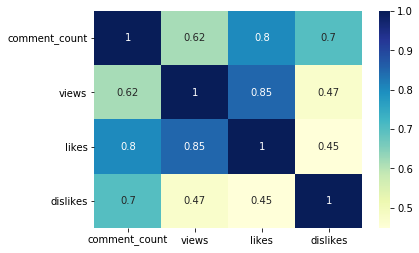

In [7]:
df_us_corr = df_us_clean.corr()
sns.heatmap(df_us_corr, annot = True, cmap = 'YlGnBu')

There is an interesting correlation between likes and comment_count, as well as likes and views.  There is also an interesting correlation between dislikes and comment_count. This could be because that people who dislike are also more likely to leave negative comments indicating why they disliked the video.

The correlation between likes and views is self-explanatory, given the nature of the dataset (trending videos only). A video should only really enter this dataset if it has a high like to view ratio. However, given that the Youtube Trending video algorithm is shrouded in mystery, there could be other underlying causes that explain the correlation between likes/comment_count and likes/views.

### Q3. For 15 points: Create and compare OLS models using variables of your choice, for a region of your choice
* select two variables (remember to filter for the region of your choice)
* use the JointGrid approach from our in-class session to visualize the relationship between the variables
* use `statsmodels` to create a regression model
* explain the how the results of the regression analysis help you understand the plot (and vice versa)

C:\Users\mrasianman3\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


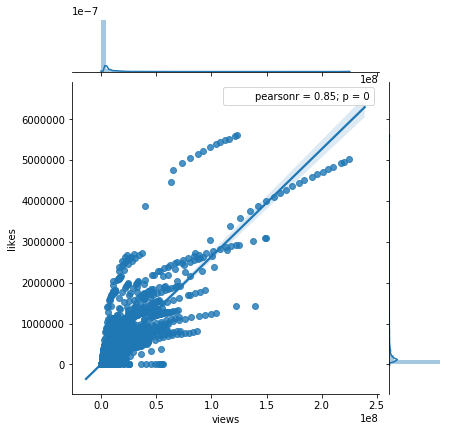

In [15]:
plot = sns.JointGrid(data = df_us_clean, x = 'views', y = 'likes')
plot = plot.plot(sns.regplot, sns.distplot)
plot = plot.annotate(stats.stats.pearsonr)

In [18]:
views_likes_model = smf.ols('likes ~ views', data = df_us_clean).fit()
views_likes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.059e+05
Date:                Thu, 21 Feb 2019   Prob (F-statistic):               0.00
Time:                        18:39:46   Log-Likelihood:            -5.3731e+05
No. Observations:               40949   AIC:                         1.075e+06
Df Residuals:                   40947   BIC:                         1.075e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.221e+04    627.053     19.473      0.000     1.1e+04    1.34e+04
views          0.0263   8.08e-05    325.376      0.000       0.026       0.026
==============================================================================
Omnibus:                    56358.973   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44741630.414
Skew:                           7.577   Prob(JB):                         0.00
Kurtosis:                     164.224   Cond. No.                     8.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The plots shows a positive, strong correlation between likes and views.

The OLS summary has an R-squared value of 0.721, meaning the model has some strong predictive power and can explain about 72% of the variation seen. As well, the large F-statistic indicates that this model is good for predicting trends between likes and views.

## Part 2: Answer the questions below based on the *[Pokémon dataset](https://www.kaggle.com/abcsds/pokemon)*
- Write Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [2]:
pokemon = pd.read_csv('data/hw4_data/Pokemon.csv', index_col = 0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Q4. For 10 Points: Plot the pairs of different ability points (HP, Attack, Sp. Attack, Defense, etc.).

* Which pairs have the most/least correlation coefficients?

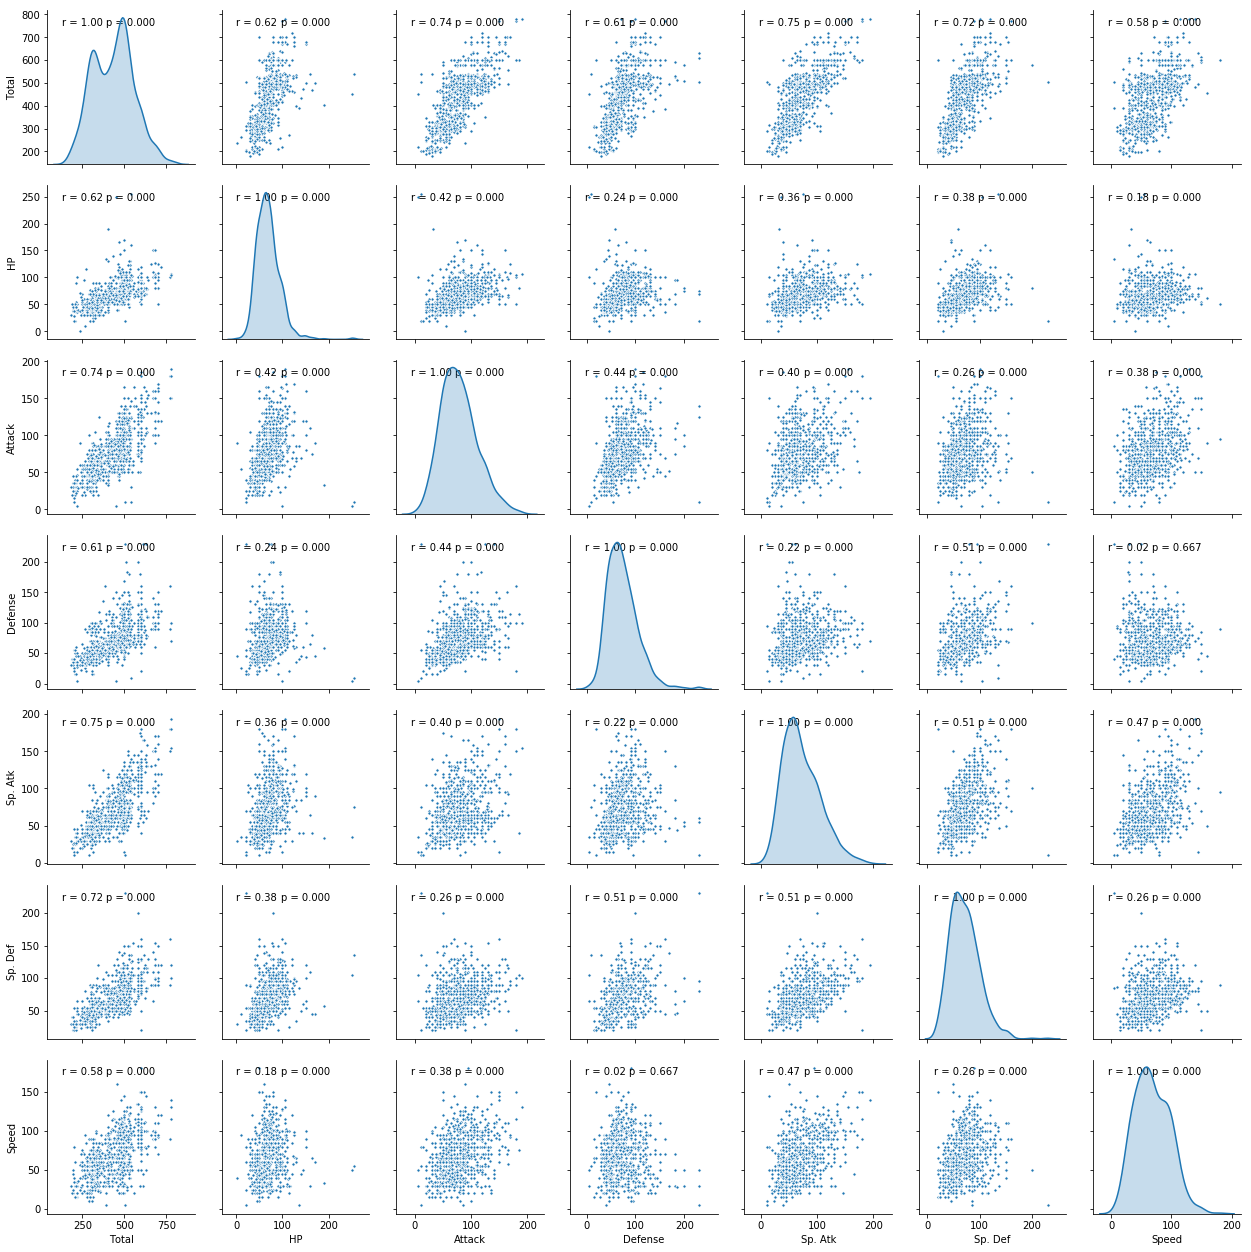

In [3]:
plots = sns.pairplot(pokemon[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], plot_kws = {'s': 10}, diag_kind = 'kde')

# Annotation function taken from https://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic
def corrfunc(x, y, **kws):
    (r, p) = stats.stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)
    
plots.map(corrfunc)

There exists strong correlations between total ability points and each subcategory of ability points. This makes sense, given that the total is just a summation of each category.

There are also correlations between special attack and special defense, as well as between regular attack/special attack and regular defense/special defense. Special attack also has a moderate correlation with speed, which makes sense, given what I know about Pokemon.

Otherwise, there are weak to no correlations between speed and all other sub-attributes.

### Q5. For 15 Points: Plot the distribution of ability points per Pokémon type

* How would you describe each Pokémon type with different ability points?

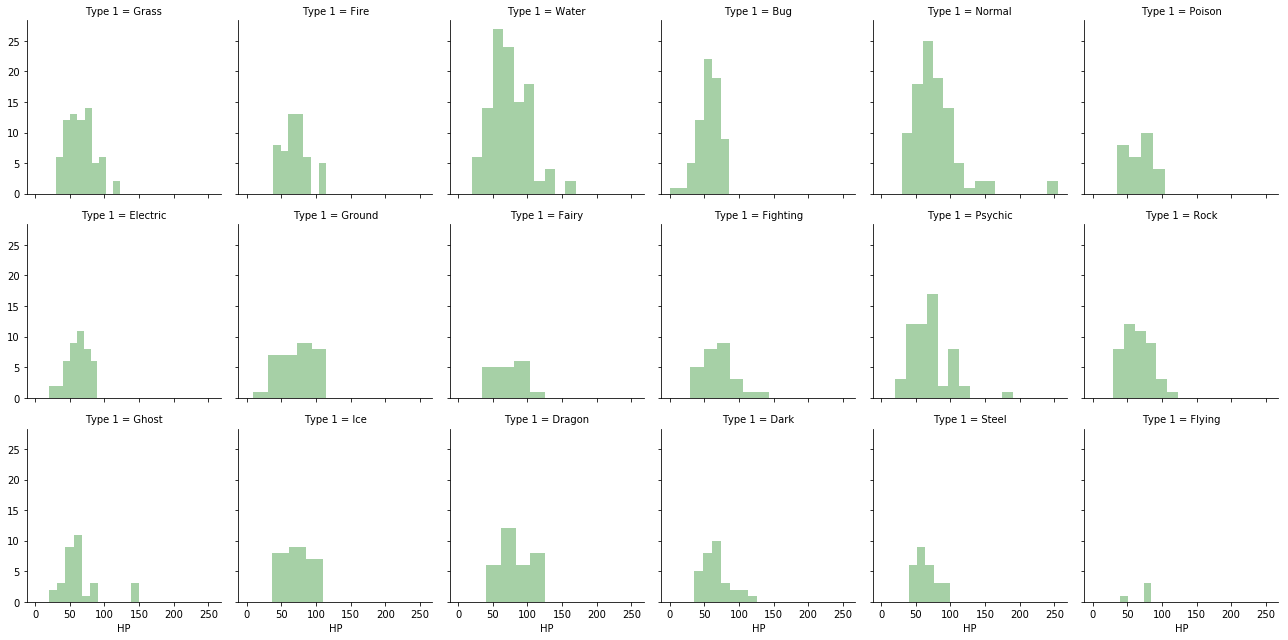

In [6]:
maps = sns.FacetGrid(pokemon, col = 'Type 1', sharey = True, sharex = True, col_wrap = 6)
maps.map(sns.distplot, 'HP', color = '#228b22', kde = False)

Looking at HP distributions by type, it seems flying type seems to have a bimodal distribution, with Pokemon of that type having either 50 or 80 HP. All other types seem to have uniform  normal or skewed normal distribution.

Certain types also contain more Pokemon than other types; Water and Normal both have more Pokemon Ice or Fighting types.

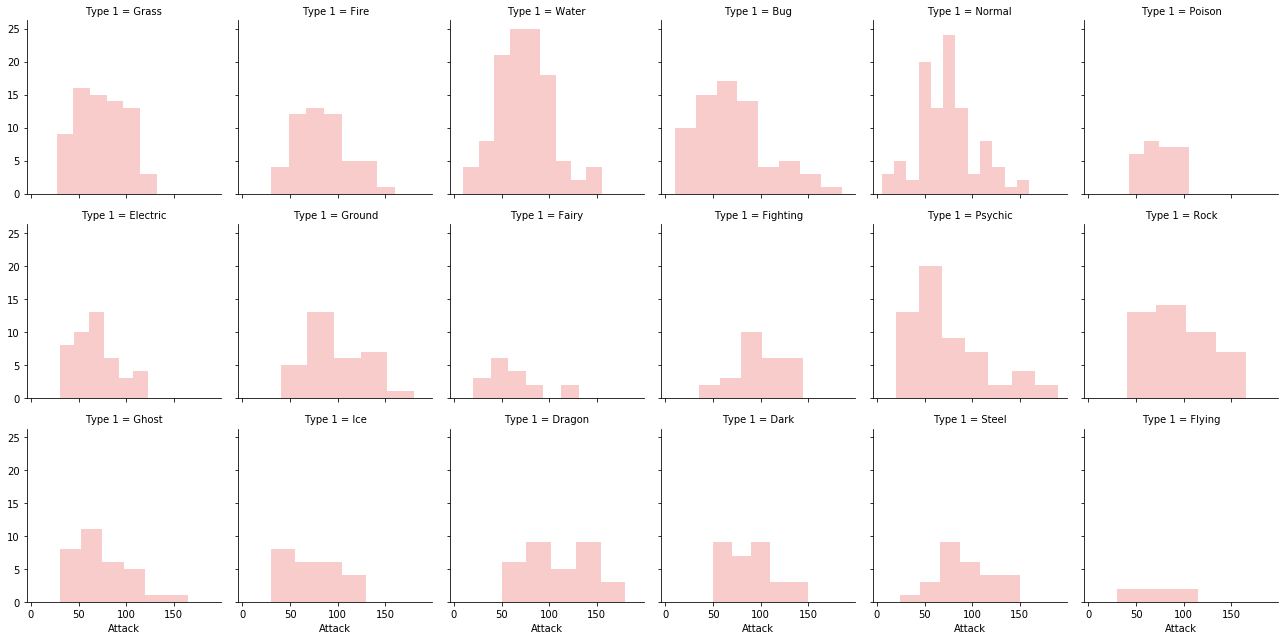

In [7]:
maps = sns.FacetGrid(pokemon, col = 'Type 1', sharey = True, sharex = True, col_wrap = 6)
maps.map(sns.distplot, 'Attack', color = '#f08080', kde = False)

Flying type has a uniform distribution for Attack; all other types seem to have some form of normal distribution. Of note, Fair and Dragon type seem to have bimodal distributions.

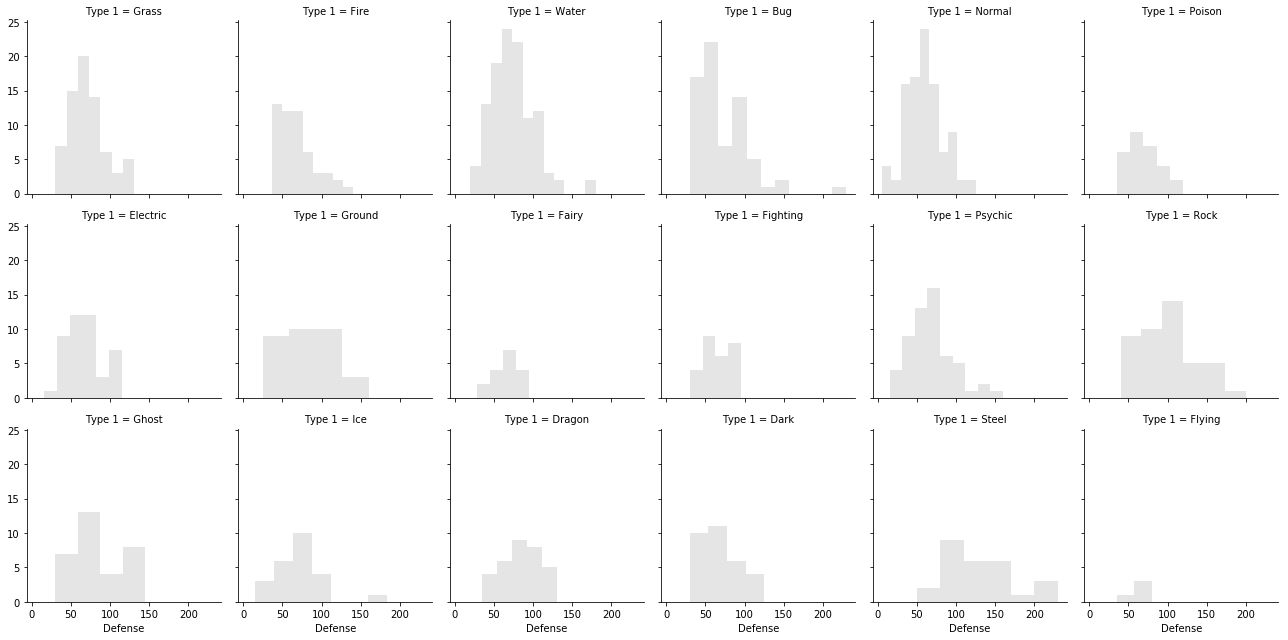

In [17]:
maps = sns.FacetGrid(pokemon, col = 'Type 1', sharey = True, sharex = True, col_wrap = 6)
maps.map(sns.distplot, 'Defense', color = '#c0c0c0', kde = False)

Fairy, Fighting, and Flying type Pokemon seem to have lower Defense attributes than all other types. Of note, Steel type has an overall higher Defense distribution than all other types.

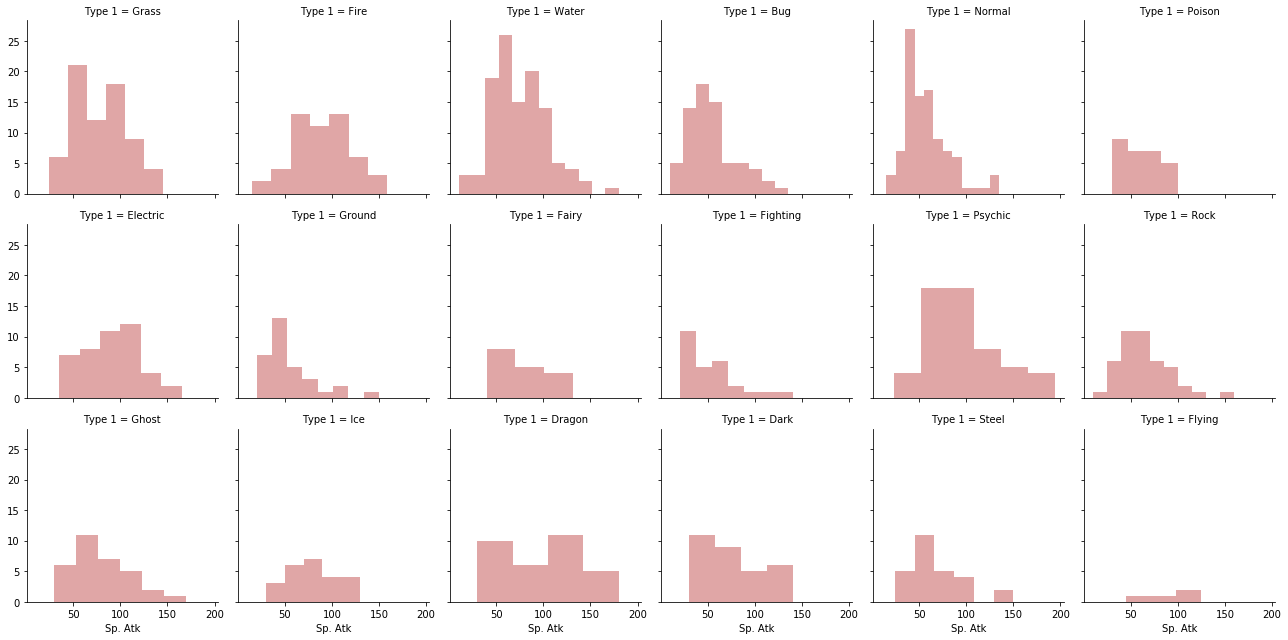

In [20]:
maps = sns.FacetGrid(pokemon, col = 'Type 1', sharey = True, sharex = True, col_wrap = 6)
maps.map(sns.distplot, 'Sp. Atk', color = '#b22222', kde = False)

Fighting type Pokemon appears to have overall lower Special Attack stats. Ground and Poison type also have lower Special Attack stats. 

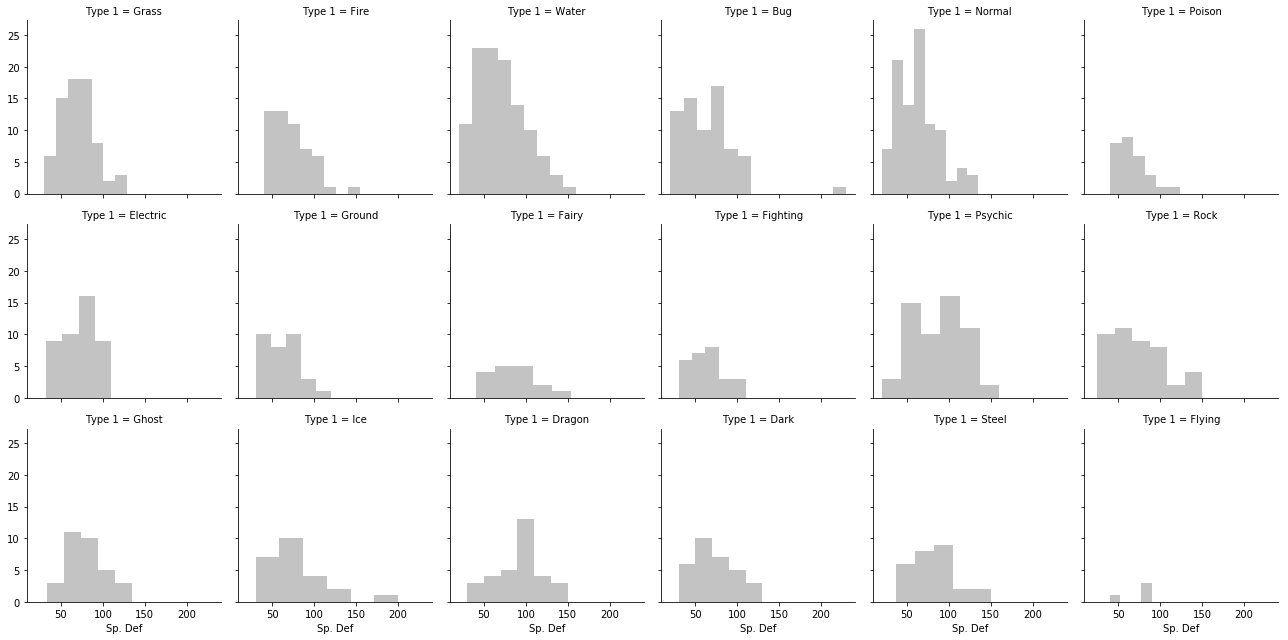

In [21]:
maps = sns.FacetGrid(pokemon, col = 'Type 1', sharey = True, sharex = True, col_wrap = 6)
maps.map(sns.distplot, 'Sp. Def', color = '#696969', kde = False)

Fighting, Poison, and Ground types have overall lower Special Defense stats. Ice type has an outlier; a single Pokemon of this type has higher Special Defense stats than all other of its type.

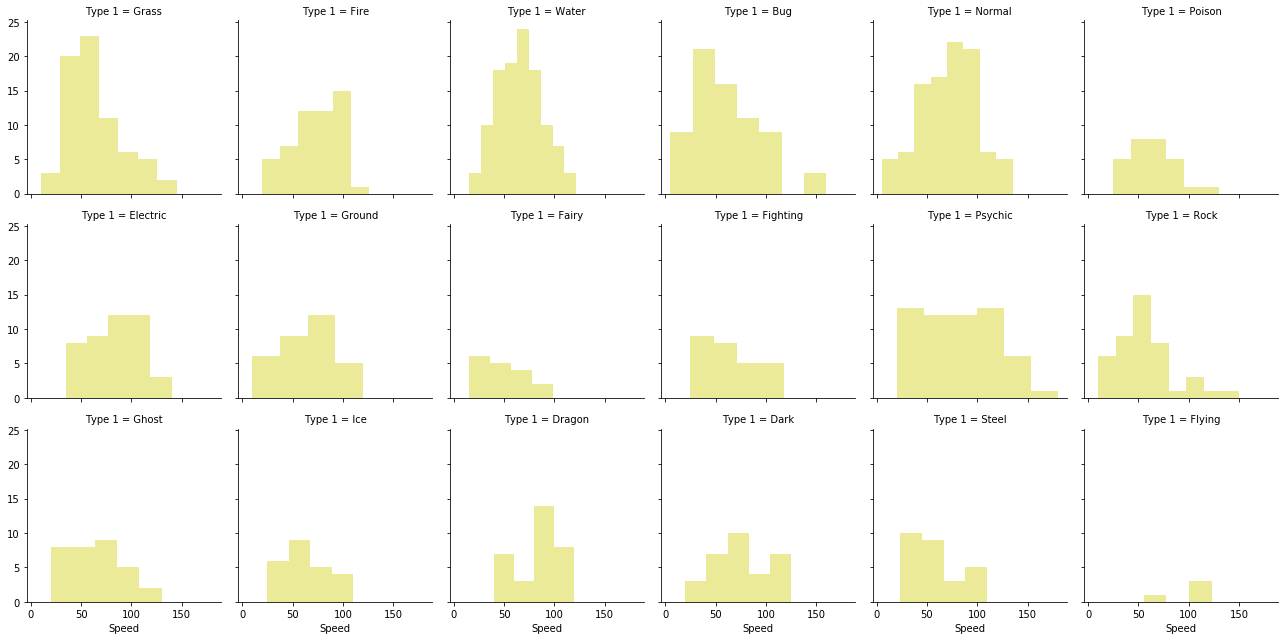

In [22]:
maps = sns.FacetGrid(pokemon, col = 'Type 1', sharey = True, sharex = True, col_wrap = 6)
maps.map(sns.distplot, 'Speed', color = '#cccc00', kde = False)

Poison and Fairy type Pokemon have overall lower Speed stats than other types. I would expect Flying type to have higher overall Speed stats, but the graphs do not reflect this.

### Q6. For 15 Points: Explore how the Pokémon in each generation differ from each other?

* Do you think designers of *Pokémon* tried to address different distributions of ability points in each generation?

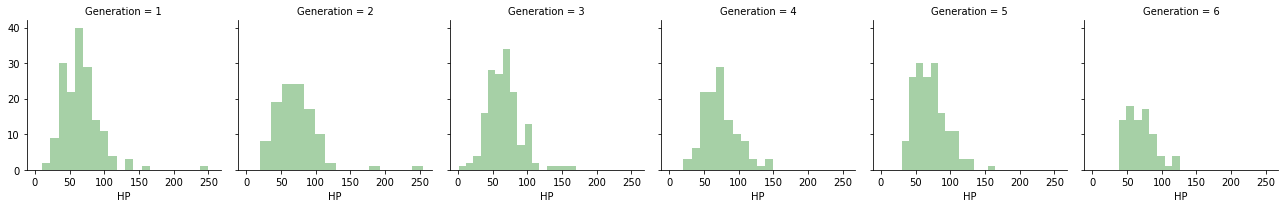

In [29]:
maps = sns.FacetGrid(pokemon, col = 'Generation', sharey = True, sharex = True)
maps.map(sns.distplot, 'HP', color = '#228b22', kde = False)

Gen 1 and 2 have Pokemon with HP values greater than 200. However, Gen 3, 4, 5, and 6 do not have such outliers. It seems that the designers decided to nerf the HP of Legendary Pokemon in the later generations.

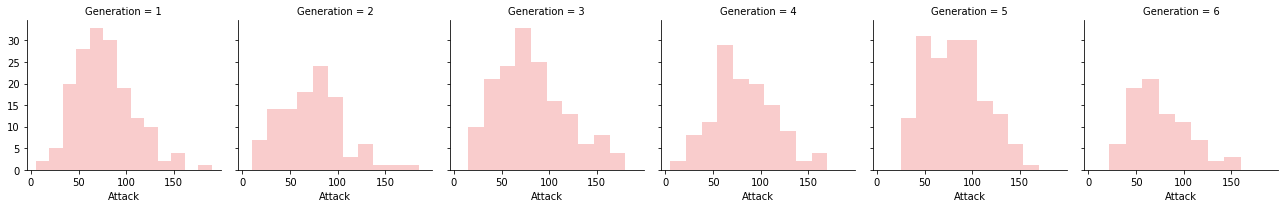

In [24]:
maps = sns.FacetGrid(pokemon, col = 'Generation', sharey = True, sharex = True)
maps.map(sns.distplot, 'Attack', color = '#f08080', kde = False)

Attack stats seem to be normaly distributed between all generations. There appear to be no major changes the Pokemon designers did between each generation with regards to the Attack stat.

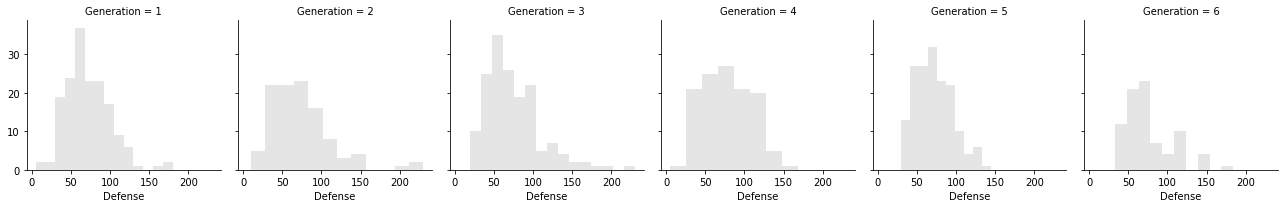

In [25]:
maps = sns.FacetGrid(pokemon, col = 'Generation', sharey = True, sharex = True)
maps.map(sns.distplot, 'Defense', color = '#c0c0c0', kde = False)

Gen 1, 3, and 5 seem to have a spike of Pokemon with a Defense stat around 50.

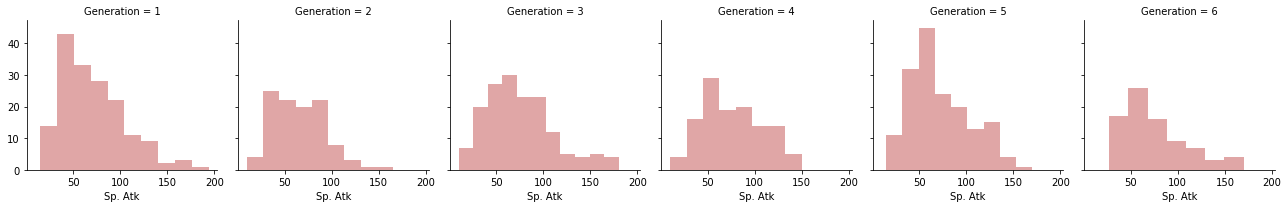

In [26]:
maps = sns.FacetGrid(pokemon, col = 'Generation', sharey = True, sharex = True)
maps.map(sns.distplot, 'Sp. Atk', color = '#b22222', kde = False)

With the exception of Gen 4, all the generations seem to have a right-skewed normal distribution.

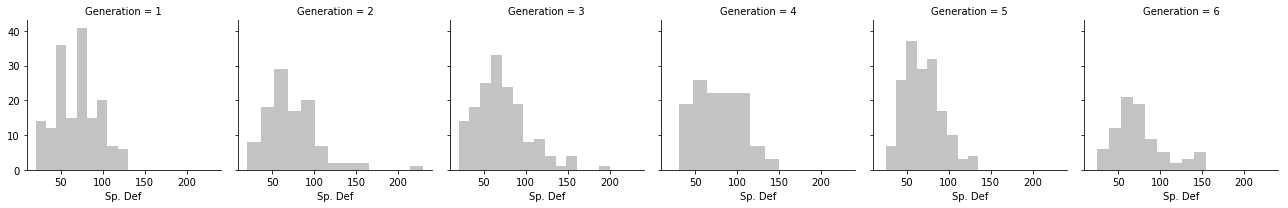

In [27]:
maps = sns.FacetGrid(pokemon, col = 'Generation', sharey = True, sharex = True)
maps.map(sns.distplot, 'Sp. Def', color = '#696969', kde = False)

Gen 1 has several peaks for Special Defense stat; all other generations appear to have more normally distributed Special Defense stats.

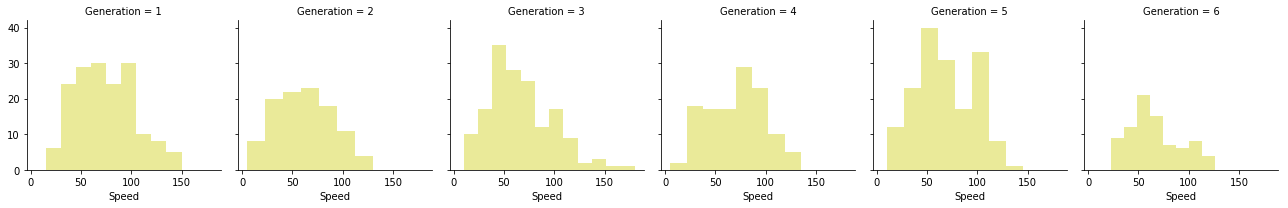

In [28]:
maps = sns.FacetGrid(pokemon, col = 'Generation', sharey = True, sharex = True)
maps.map(sns.distplot, 'Speed', color = '#cccc00', kde = False)

With the exception of Gen 5, all the of the generations appear to have a normally distributed Speed stat. Gen 5 has a spike around Speed stat of 100, meaning the designers decided to have more speedier Pokemon in Gen 5.